# Table of Contents

## 1. Distribution of Customers by Age
## 2. Region Customer Count
## 3. Sales Per Region
## 4. Sales Per Department

# Importing Libraries and Data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy

# import df

path = r'C:\Users\Charles Yi\04-2023 Instacart Basket Analysis\02 Data\Prepared Data'

df_1 = pd.read_pickle(os.path.join(path, 'cust_ords_prods_prior_3.pkl'))
df_2 = pd.read_pickle(os.path.join(path, 'dep_cust_profile.pkl'))

In [2]:
# elminiating column and row restrictions

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
# checking df_1 head

df_1.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_period_of_day,order_attribute,max_order,loyalty_flag,mean_price,spending_class,median_order_interval,frequent_customer,first_name,last_name,gender,state,Age,date_joined,n_dependants,fam_status,income,mean_price_updated,spending_class_updated,region,low_activity_customer_?,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly Busy,Average orders,first_time_order,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,6.367797,Low spender,South,0.0,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest Days,Average orders,return_order,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,6.367797,Low spender,South,0.0,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest Days,Most orders,return_order,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,6.367797,Low spender,South,0.0,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest Days,Average orders,return_order,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,6.367797,Low spender,South,0.0,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest Days,Most orders,return_order,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,6.367797,Low spender,South,0.0,beverages


In [4]:
# checking df_2 head

df_2.head()

,user_id,region,Age,income,n_dependants,department_id,product_name,prices,add_to_cart_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,age_group,income_group,family_group,department
0,1,South,31,40423,3,7,Soda,9.0,1,2,8,NaN,18-44,Low income,Family,beverages
1,1,South,31,40423,3,7,Soda,9.0,1,3,7,15.0,18-44,Low income,Family,beverages
2,1,South,31,40423,3,7,Soda,9.0,1,3,12,21.0,18-44,Low income,Family,beverages
3,1,South,31,40423,3,7,Soda,9.0,1,4,7,29.0,18-44,Low income,Family,beverages
4,1,South,31,40423,3,7,Soda,9.0,1,4,15,28.0,18-44,Low income,Family,beverages


# 1. Distribution of Customers by Age

In [2]:
# grouping df_2 income_group, count of user_id, and sum of prices

income_stats = df_2.groupby('income_group').agg({'user_id' : ['nunique', 'count'], 'prices' : 'sum'})

income_stats

user_id                 prices
              nunique     count          sum
income_group                                
High income     23254   4051581   32166900.5
Low income      76854  10442766   77639088.3
Middle income  106101  17910512  142620131.8

In [3]:
# indexing income_stats

income_stats_index = income_stats.reset_index()

income_stats_index

income_group user_id                 prices
                 nunique     count          sum
0    High income   23254   4051581   32166900.5
1     Low income   76854  10442766   77639088.3
2  Middle income  106101  17910512  142620131.8

In [4]:
# turning multi-index into one index using join function

income_stats_index.columns = income_stats_index.columns.map(''.join)

income_stats_index

,income_group,user_idnunique,user_idcount,pricessum
0,High income,23254,4051581,32166900.5
1,Low income,76854,10442766,77639088.3
2,Middle income,106101,17910512,142620131.8


In [5]:
# re-ordering rows

income_stats_index = income_stats_index.iloc[[0, 2, 1], :]

Text(0.5, 1.0, 'Distribution of Customers')

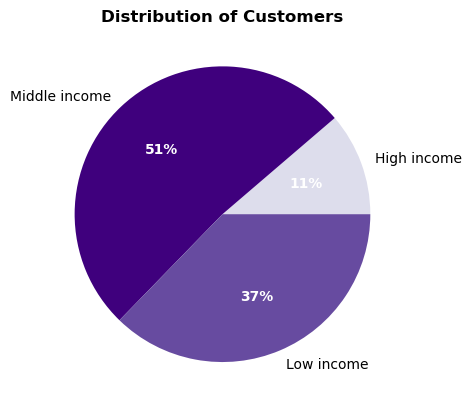

In [10]:
# creating pie chart with distribution of user_id

colors = plt.get_cmap('Purples')

values = income_stats_index['user_idnunique']

labels = income_stats_index.income_group

patches, label, percentage = income_distribution_pie = plt.pie(values, labels = labels, autopct = '%.0f%%', colors = colors((income_stats_index['user_idnunique'])/100000))

for text in percentage:
    text.set_color('white'),
    text.set_fontweight('bold')
    
plt.title('Distribution of Customers', fontweight = 'bold')

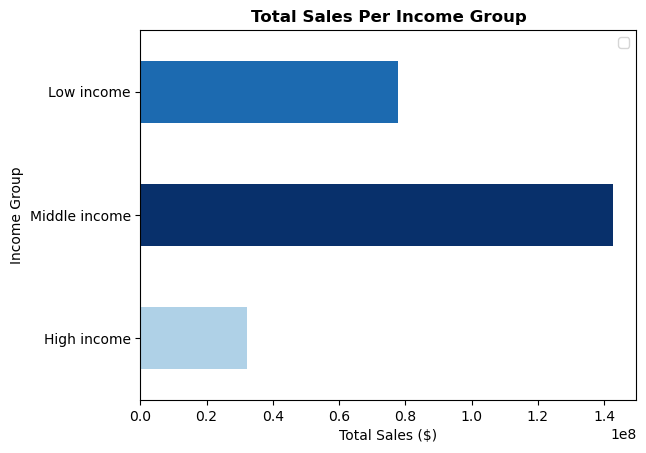

In [51]:
# creating bar with sum of prices

colors = plt.get_cmap('Blues')

income_price_bar = ax = income_stats_index.plot.barh(x = 'income_group', y= 'pricessum', color = colors((income_stats_index['pricessum'])/100000000))

income_price_bar

plt.ylabel('Income Group')
ax.set_xlabel('Total Sales ($)')
ax.set_title('Total Sales Per Income Group', fontweight = 'bold')
ax.legend('')
plt.grid(False)

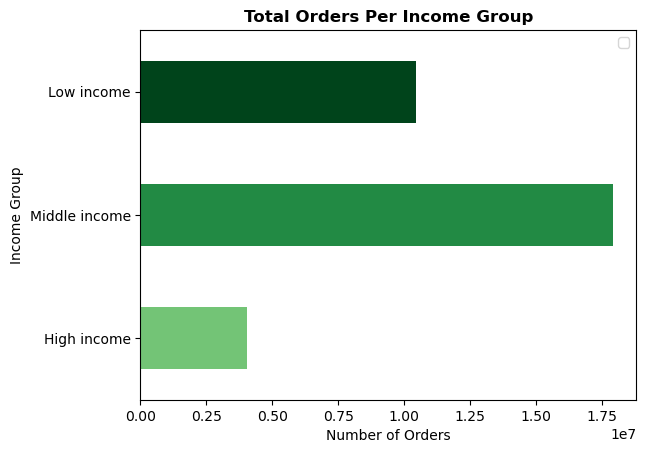

In [7]:
# plotting bar chart of number of orders per income group

colors = plt.get_cmap('Greens')(np.linspace(0.5,1,3))

income_orders_bar = ax = income_stats_index.plot.barh(x='income_group', y = 'user_idcount', color = colors)

colors = plt.get_cmap('Greens')

ax.set_title('Total Orders Per Income Group', fontweight = 'bold')
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Income Group')
plt.grid(False)
ax.legend('')

In [13]:
# order habits of tables

income_order_habits = df_2.groupby('income_group').agg({'prices' : 'mean' , 'orders_day_of_week' : 'mean', 'order_hour_of_day' : 'mean', 'days_since_prior_order' : 'mean'})

In [1]:
# resetting index

income_order_habits_index = income_order_habits.reset_index()

income_order_habits_index

NameError: name 'income_order_habits' is not defined

In [15]:
# re-naming columns

income_order_habits_index = income_order_habits_index.rename(columns = {'prices' : 'avg_prices' , 'orders_day_of_week' : 'avg_orders_day_of_week', 'order_hour_of_day' : 'avg_order_hour_of_day', 'days_since_prior_order' : 'avg_days_since_prior_order'})

income_order_habits_index

,income_group,avg_prices,avg_orders_day_of_week,avg_order_hour_of_day,avg_days_since_prior_order
0,High income,7.946928,2.746171,13.447130,10.941393
1,Low income,7.434729,2.737800,13.361811,11.240514
2,Middle income,7.963487,2.737837,13.457106,11.061703


In [16]:
# rounding numbers to two decimal places

income_order_habits_index = income_order_habits_index.round(2)

income_order_habits_index

,income_group,avg_prices,avg_orders_day_of_week,avg_order_hour_of_day,avg_days_since_prior_order
0,High income,7.95,2.75,13.45,10.94
1,Low income,7.43,2.74,13.36,11.24
2,Middle income,7.96,2.74,13.46,11.06


In [17]:
# changing row order

income_order_habits_index = income_order_habits_index.reindex([1,2,0])

income_order_habits_index

,income_group,avg_prices,avg_orders_day_of_week,avg_order_hour_of_day,avg_days_since_prior_order
1,Low income,7.43,2.74,13.36,11.24
2,Middle income,7.96,2.74,13.46,11.06
0,High income,7.95,2.75,13.45,10.94


In [61]:
income_order_habits_index.to_clipboard()

# 2. Region Customer Count

In [18]:
income_region = df_2.groupby(['region', 'income_group']).agg({'user_id' : 'nunique' , 'prices' : 'sum'})

In [19]:
# resetting index

income_region_index = income_region.reset_index()

income_region_index

,region,income_group,user_id,prices
0,Midwest,High income,5504,7577995.4
1,Midwest,Low income,18041,18066589.0
2,Midwest,Middle income,24974,33548393.3
3,Northeast,High income,4129,5617829.3
4,Northeast,Low income,13381,13520460.0
5,Northeast,Middle income,18878,25391816.5
6,South,High income,7696,10664251.7
7,South,Low income,25617,25967824.4
8,South,Middle income,35424,47475834.3
9,West,High income,5925,8306824.1


In [20]:
# pivoting to move income_group to column

income_region_pivot = income_region_index.pivot(index = 'region', columns = 'income_group', values=['user_id', 'prices'])

income_region_pivot

user_id                               prices              \
income_group High income Low income Middle income High income  Low income   
region                                                                      
Midwest           5504.0    18041.0       24974.0   7577995.4  18066589.0   
Northeast         4129.0    13381.0       18878.0   5617829.3  13520460.0   
South             7696.0    25617.0       35424.0  10664251.7  25967824.4   
West              5925.0    19815.0       26825.0   8306824.1  20084214.9   

                            
income_group Middle income  
region                      
Midwest         33548393.3  
Northeast       25391816.5  
South           47475834.3  
West            36204087.7

In [21]:
# resetting index

income_region_reset = income_region_pivot.reset_index(drop = False)

In [22]:
# checking result

income_region_reset

region     user_id                               prices  \
income_group            High income Low income Middle income High income   
0               Midwest      5504.0    18041.0       24974.0   7577995.4   
1             Northeast      4129.0    13381.0       18878.0   5617829.3   
2                 South      7696.0    25617.0       35424.0  10664251.7   
3                  West      5925.0    19815.0       26825.0   8306824.1   

                                        
income_group  Low income Middle income  
0             18066589.0    33548393.3  
1             13520460.0    25391816.5  
2             25967824.4    47475834.3  
3             20084214.9    36204087.7

In [23]:
# isolating user_id and region

income_region_user = income_region_reset[['region', 'user_id']]

income_region_user

region     user_id                         
income_group            High income Low income Middle income
0               Midwest      5504.0    18041.0       24974.0
1             Northeast      4129.0    13381.0       18878.0
2                 South      7696.0    25617.0       35424.0
3                  West      5925.0    19815.0       26825.0

In [24]:
# converting to single index

income_region_user.columns = income_region_user.columns.map(''.join)

income_region_user

,region,user_idHigh income,user_idLow income,user_idMiddle income
0,Midwest,5504.0,18041.0,24974.0
1,Northeast,4129.0,13381.0,18878.0
2,South,7696.0,25617.0,35424.0
3,West,5925.0,19815.0,26825.0


In [25]:
# renaming columns

income_region_user = income_region_user.rename(columns = {'user_idHigh income' : 'High income' , 'user_idLow income' : 'Low income', 'user_idMiddle income' : 'Middle income'})

In [26]:
# checking result

income_region_user

,region,High income,Low income,Middle income
0,Midwest,5504.0,18041.0,24974.0
1,Northeast,4129.0,13381.0,18878.0
2,South,7696.0,25617.0,35424.0
3,West,5925.0,19815.0,26825.0


In [27]:
# re-ordering columns

income_region_user_reindex = income_region_user.reindex(columns = ['region', 'High income', 'Middle income', 'Low income'])

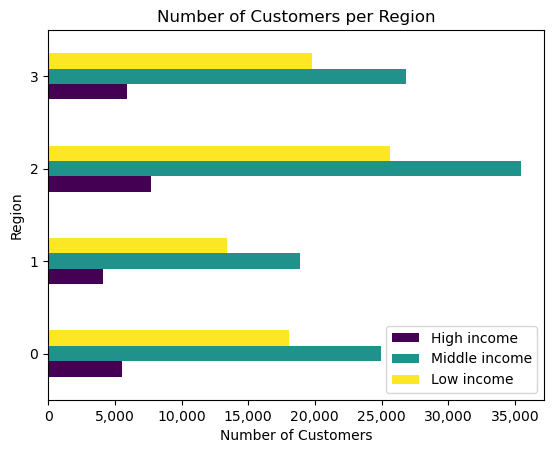

In [28]:
# bar charting

color = plt.get_cmap('viridis', 3)

income_region_bar = ax = income_region_user_reindex.plot.barh(color = color(range(3)))

ax.set_title('Number of Customers per Region')
ax.set_xlabel('Number of Customers')
ax.set_ylabel('Region')

def comma(x, pos):
    return '{:,.0f}'.format(x)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(comma))

# 3. Sales Per Region

In [29]:
income_region_pivot

user_id                               prices              \
income_group High income Low income Middle income High income  Low income   
region                                                                      
Midwest           5504.0    18041.0       24974.0   7577995.4  18066589.0   
Northeast         4129.0    13381.0       18878.0   5617829.3  13520460.0   
South             7696.0    25617.0       35424.0  10664251.7  25967824.4   
West              5925.0    19815.0       26825.0   8306824.1  20084214.9   

                            
income_group Middle income  
region                      
Midwest         33548393.3  
Northeast       25391816.5  
South           47475834.3  
West            36204087.7

In [30]:
# isolating prices

income_region_prices = income_region_pivot[['prices']]

income_region_prices

prices                          
income_group High income  Low income Middle income
region                                            
Midwest        7577995.4  18066589.0    33548393.3
Northeast      5617829.3  13520460.0    25391816.5
South         10664251.7  25967824.4    47475834.3
West           8306824.1  20084214.9    36204087.7

In [31]:
# resetting index

income_region_prices_index = income_region_prices.reset_index()

In [32]:
income_region_prices_index

region      prices                          
income_group            High income  Low income Middle income
0               Midwest   7577995.4  18066589.0    33548393.3
1             Northeast   5617829.3  13520460.0    25391816.5
2                 South  10664251.7  25967824.4    47475834.3
3                  West   8306824.1  20084214.9    36204087.7

In [33]:
# converting to single index

income_region_prices_index.columns = income_region_user.columns.map(''.join)

income_region_prices_index

,region,High income,Low income,Middle income
0,Midwest,7577995.4,18066589.0,33548393.3
1,Northeast,5617829.3,13520460.0,25391816.5
2,South,10664251.7,25967824.4,47475834.3
3,West,8306824.1,20084214.9,36204087.7


In [34]:
# re-ordering columns

income_region_prices_index = income_region_prices_index[['region', 'High income', 'Middle income', 'Low income']]

In [35]:
income_region_prices_index

,region,High income,Middle income,Low income
0,Midwest,7577995.4,33548393.3,18066589.0
1,Northeast,5617829.3,25391816.5,13520460.0
2,South,10664251.7,47475834.3,25967824.4
3,West,8306824.1,36204087.7,20084214.9


In [36]:
# sorting

income_region_prices_index = income_region_prices_index.sort_values(by = 'High income')

Text(0, 0.5, 'Region')

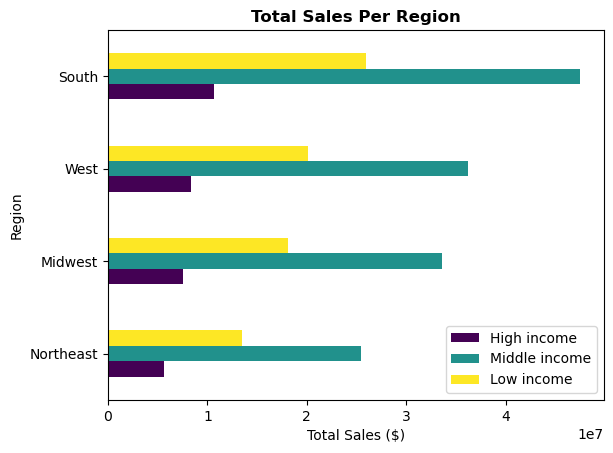

In [62]:
# creating bar chart

color = plt.get_cmap('viridis', 3)

income_region_prices_bar = ax = income_region_prices_index.plot.barh(x = 'region', color = color(range(3)))

ax.set_title('Total Sales Per Region', fontweight = 'bold')
ax.set_xlabel('Total Sales ($)')
ax.set_ylabel('Region')

# 4. Sales Per Department

In [38]:
df_2.head()

,user_id,region,Age,income,n_dependants,department_id,product_name,prices,add_to_cart_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,age_group,income_group,family_group,department
0,1,South,31,40423,3,7,Soda,9.0,1,2,8,NaN,18-44,Low income,Family,beverages
1,1,South,31,40423,3,7,Soda,9.0,1,3,7,15.0,18-44,Low income,Family,beverages
2,1,South,31,40423,3,7,Soda,9.0,1,3,12,21.0,18-44,Low income,Family,beverages
3,1,South,31,40423,3,7,Soda,9.0,1,4,7,29.0,18-44,Low income,Family,beverages
4,1,South,31,40423,3,7,Soda,9.0,1,4,15,28.0,18-44,Low income,Family,beverages


In [39]:
# grouping df by department and income_group. aggregating number of customers and totol sales

income_department = df_2.groupby(['department', 'income_group']).agg({'user_id' : 'nunique', 'prices' : 'sum'})

In [40]:
income_department

user_id      prices
department      income_group                      
alcohol         High income       2188    207536.5
                Low income        5460    373370.0
                Middle income     8150    670747.8
babies          High income       4248    415258.5
                Low income       10199    900504.5
                Middle income    19283   1921397.6
bakery          High income      16921   1215400.9
                Low income       47161   2750088.5
                Middle income    76216   5242536.6
beverages       High income      19894   2570691.3
                Low income       62952   6982193.1
                Middle income    89941  11093250.7
breakfast       High income      13687    716226.2
                Low income       39413   1894775.5
                Middle income    60686   3033624.3
bulk            High income       1457     32138.9
                Low income        4239     99878.3
                Middle income     6788    156631.4
canned goods    High income      16448   1050085.4
                Low income       43515   2335226.2
                Middle income    73770   4667820.4
dairy eggs      High income      22137   5754943.2
                Low income       67945  13468113.2
                Middle income   100454  25733068.9
deli            High income      16126   1034831.5
                Low income       45319   2507711.3
                Middle income    72420   4634809.0
dry goods pasta High income      15465    822321.0
                Low income       39862   1840886.0
                Middle income    69493   3706746.6
frozen          High income      19436   2258769.5
                Low income       56201   5282729.0
                Middle income    87587   9747708.3
household       High income      13286    728195.5
                Low income       39458   1774070.4
                Middle income    58864   2952086.8
international   High income       9630    266693.3
                Low income       23841    606632.5
                Middle income    43112   1195146.9
meat seafood    High income      14509   1571777.1
                Low income       33958   3020586.8
                Middle income    65424   6959206.4
missing         High income       3507     76637.3
                Low income        8917    190122.9
                Middle income    15438    332085.0
other           High income       2321     35577.7
                Low income        5677     77443.6
                Middle income     9877    140686.7
pantry          High income      20314   1948147.6
                Low income       60302   4525866.7
                Middle income    92124   8546646.5
personal care   High income      11417    450039.6
                Low income       31948   1140201.5
                Middle income    50713   1988888.8
pets            High income       2068    108156.5
                Low income        4707    227759.2
                Middle income     8211    434972.7
produce         High income      22251   9541850.1
                Low income       69793  22606451.9
                Middle income   101193  43512632.5
snacks          High income      19904   1361622.9
                Low income       64615   5034477.2
                Middle income    89700   5949437.9

In [41]:
# isolating prices

income_department_prices = income_department[['prices']]

In [42]:
income_department_prices

prices
department      income_group             
alcohol         High income      207536.5
                Low income       373370.0
                Middle income    670747.8
babies          High income      415258.5
                Low income       900504.5
                Middle income   1921397.6
bakery          High income     1215400.9
                Low income      2750088.5
                Middle income   5242536.6
beverages       High income     2570691.3
                Low income      6982193.1
                Middle income  11093250.7
breakfast       High income      716226.2
                Low income      1894775.5
                Middle income   3033624.3
bulk            High income       32138.9
                Low income        99878.3
                Middle income    156631.4
canned goods    High income     1050085.4
                Low income      2335226.2
                Middle income   4667820.4
dairy eggs      High income     5754943.2
                Low income     13468113.2
                Middle income  25733068.9
deli            High income     1034831.5
                Low income      2507711.3
                Middle income   4634809.0
dry goods pasta High income      822321.0
                Low income      1840886.0
                Middle income   3706746.6
frozen          High income     2258769.5
                Low income      5282729.0
                Middle income   9747708.3
household       High income      728195.5
                Low income      1774070.4
                Middle income   2952086.8
international   High income      266693.3
                Low income       606632.5
                Middle income   1195146.9
meat seafood    High income     1571777.1
                Low income      3020586.8
                Middle income   6959206.4
missing         High income       76637.3
                Low income       190122.9
                Middle income    332085.0
other           High income       35577.7
                Low income        77443.6
                Middle income    140686.7
pantry          High income     1948147.6
                Low income      4525866.7
                Middle income   8546646.5
personal care   High income      450039.6
                Low income      1140201.5
                Middle income   1988888.8
pets            High income      108156.5
                Low income       227759.2
                Middle income    434972.7
produce         High income     9541850.1
                Low income     22606451.9
                Middle income  43512632.5
snacks          High income     1361622.9
                Low income      5034477.2
                Middle income   5949437.9

In [43]:
# resetting index

income_department_prices_index = income_department_prices.reset_index()

income_department_prices_index

,department,income_group,prices
0,alcohol,High income,207536.5
1,alcohol,Low income,373370.0
2,alcohol,Middle income,670747.8
3,babies,High income,415258.5
4,babies,Low income,900504.5
5,babies,Middle income,1921397.6
6,bakery,High income,1215400.9
7,bakery,Low income,2750088.5
8,bakery,Middle income,5242536.6
9,beverages,High income,2570691.3


In [44]:
# pivoting

income_department_prices_pivot = income_department_prices_index.pivot(index = 'department', columns = 'income_group', values = 'prices')

In [45]:
income_department_prices_pivot

income_group,High income,Low income,Middle income
department,,,
alcohol,207536.5,373370.0,670747.8
babies,415258.5,900504.5,1921397.6
bakery,1215400.9,2750088.5,5242536.6
beverages,2570691.3,6982193.1,11093250.7
breakfast,716226.2,1894775.5,3033624.3
bulk,32138.9,99878.3,156631.4
canned goods,1050085.4,2335226.2,4667820.4
dairy eggs,5754943.2,13468113.2,25733068.9
deli,1034831.5,2507711.3,4634809.0


In [46]:
# resetting index

income_department_prices_pivot = income_department_prices_pivot.reset_index()

In [47]:
income_department_prices_pivot

income_group,department,High income,Low income,Middle income
0,alcohol,207536.5,373370.0,670747.8
1,babies,415258.5,900504.5,1921397.6
2,bakery,1215400.9,2750088.5,5242536.6
3,beverages,2570691.3,6982193.1,11093250.7
4,breakfast,716226.2,1894775.5,3033624.3
5,bulk,32138.9,99878.3,156631.4
6,canned goods,1050085.4,2335226.2,4667820.4
7,dairy eggs,5754943.2,13468113.2,25733068.9
8,deli,1034831.5,2507711.3,4634809.0
9,dry goods pasta,822321.0,1840886.0,3706746.6


In [48]:
# re-ordering columns

income_department_prices_pivot = income_department_prices_pivot.reindex(columns = ['department', 'High income', 'Middle income', 'Low income'])

In [49]:
# sorting

income_department_prices_pivot = income_department_prices_pivot.sort_values(by = 'High income')

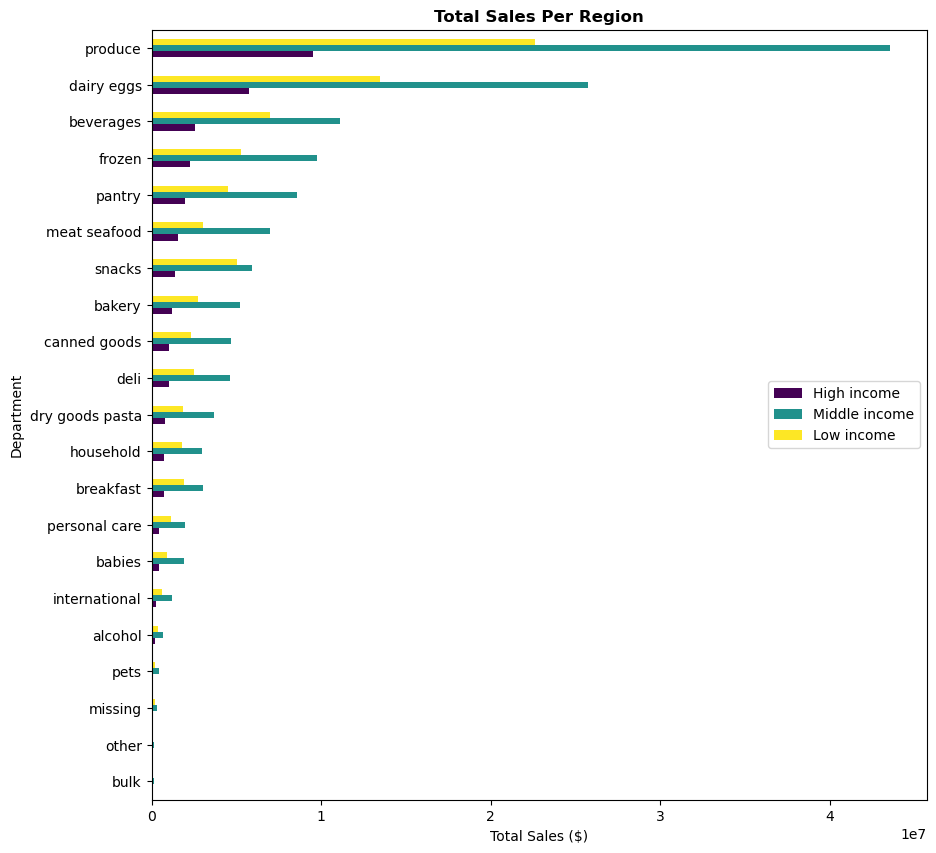

In [63]:
# bar charting

color = plt.get_cmap('viridis', 3)

ax = income_department_prices_bar = income_department_prices_pivot.plot.barh(x = 'department', figsize = (10, 10), color = color(range(3)))

ax.set_title('Total Sales Per Region', fontweight = 'bold')
ax.set_ylabel('Department')
ax.set_xlabel('Total Sales ($)')
ax.legend(title = '', loc = 'center right')